In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("seaborn",sns.__version__)
print("Matplotlib",plt.__version__)

numpy 1.26.4
pandas 2.2.2
seaborn 0.13.2


AttributeError: module 'matplotlib.pyplot' has no attribute '__version__'

In [94]:
df=pd.read_csv("Car details.csv")

In [95]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [96]:
df.shape

(8128, 13)

In [97]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [98]:
df=df.dropna(how="any")

In [99]:
import re

In [100]:
res='190Nm@ 2000rpm'.replace(".","")
res=res.replace(",","")
a=[int(s) for s in re.findall(r'\d+',res)]
a

[190, 2000]

In [101]:
torque_list=df["torque"].to_list()
torque_rpm=[]
def extractingRPM(x):
    for item in x:
        res =item.replace(".","")
        res=res.replace(",","")
        temp=[int(s) for s in re.findall(r'\d+',res)]
        torque_rpm.append(max(temp))
extractingRPM(torque_list)
print(torque_list[:2])
print(torque_rpm[:2])

['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm']
[2000, 2500]


In [102]:
df["torque_rpm"]=torque_rpm

In [103]:
df


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,4000
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,2750
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,2000
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,3000


In [104]:
max_power=df["max_power"].to_list()
max_power_extracted=[]

def extractmax_power(x):
    for item in x:
        temp=[]
        try:
            for s in item.split(" "):
                temp.append(float(s))
        except:
            pass
        max_power_extracted.append(max(temp))
    
extractmax_power(max_power)
print(max_power[:2])
print(max_power_extracted[:2])
df["max_power_bhp"]=max_power_extracted

['74 bhp', '103.52 bhp']
[74.0, 103.52]


In [105]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_power_bhp
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,88.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,4000,82.85
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,2750,110.00
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,2000,73.90
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,3000,70.00


In [106]:
engine=df["engine"].to_list()
engine_cc=[]

def extractengine(x):
    for item in x:
        temp=[]
        try:
            for s in item.split(" "):
                temp.append(float(s))
        except:
            pass
        engine_cc.append(max(temp))
    
extractengine(engine)
print(engine[:2])
print(engine_cc[:2])
df["engine_cc"]=engine_cc
df

['1248 CC', '1498 CC']
[1248.0, 1498.0]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_power_bhp,engine_cc
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,74.00,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,103.52,1498.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,78.00,1497.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,90.00,1396.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,88.20,1298.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,4000,82.85,1197.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,2750,110.00,1493.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,2000,73.90,1248.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,3000,70.00,1396.0


In [107]:
mileage=df["mileage"].to_list()
mileage_kmpl=[]

def extractmileage(x):
    for item in x:
        temp=[]
        try:
            for s in item.split(" "):
                temp.append(float(s))
        except:
            pass
        mileage_kmpl.append(max(temp))
    
extractmileage(mileage)
print(mileage[:2])
print(mileage_kmpl[:2])
df["mileage_kmpl"]=mileage_kmpl
df

['23.4 kmpl', '21.14 kmpl']
[23.4, 21.14]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_power_bhp,engine_cc,mileage_kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,74.00,1248.0,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,103.52,1498.0,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,78.00,1497.0,17.70
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,90.00,1396.0,23.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,88.20,1298.0,16.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,4000,82.85,1197.0,18.50
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,2750,110.00,1493.0,16.80
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,2000,73.90,1248.0,19.30
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,3000,70.00,1396.0,23.57


In [108]:
df=df.drop(["max_power","mileage","torque","engine"],axis=1)

In [109]:
df.describe()

,year,selling_price,km_driven,seats,torque_rpm,max_power_bhp,engine_cc,mileage_kmpl
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393,3474.631419,91.587374,1458.708829,19.419861
std,3.863695,8.135827e+05,5.679230e+04,0.959208,2579.612132,35.747216,503.893057,4.036263
min,1994.000000,2.999900e+04,1.000000e+00,2.000000,400.000000,32.800000,624.000000,0.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000,2500.000000,68.050000,1197.000000,16.780000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,3000.000000,82.000000,1248.000000,19.300000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000,4000.000000,102.000000,1582.000000,22.320000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,43639.000000,400.000000,3604.000000,42.000000


<Axes: >

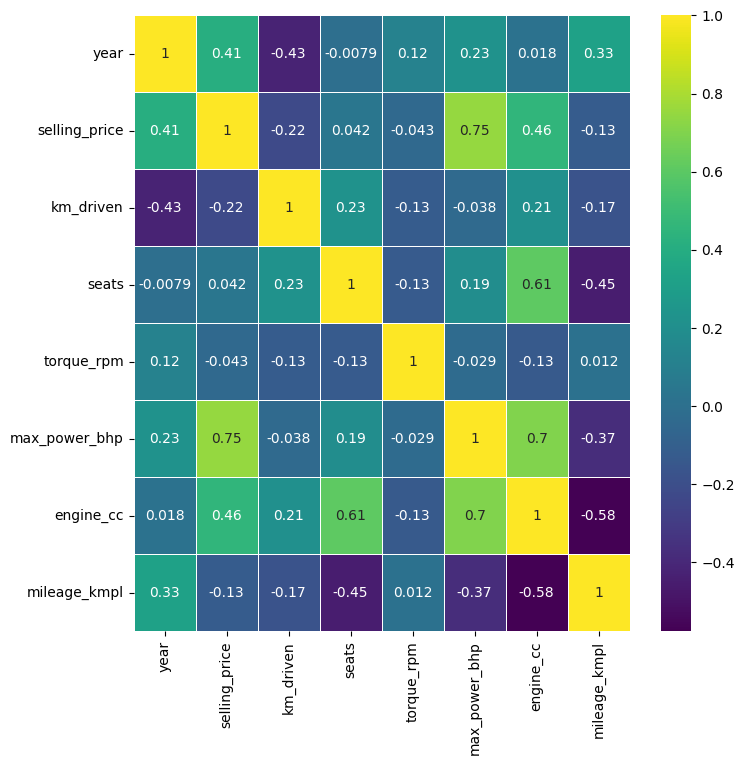

In [110]:
df_new=df.drop(["name","fuel","seller_type","transmission","owner"],axis=1)
plt.figure(figsize=(8,8))
sns.heatmap(df_new.corr(),annot=True,cmap="viridis",linewidth=0.5)

In [111]:
df["fuel"].value_counts()

fuel
Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: count, dtype: int64

In [112]:
df["transmission"].value_counts()

transmission
Manual       6865
Automatic    1041
Name: count, dtype: int64

In [113]:
df["seller_type"].value_counts()

seller_type
Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: count, dtype: int64

In [114]:
df["owner"].value_counts()

owner
First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: count, dtype: int64

In [115]:
def transmission(x):
    if x=="Manual":
        return 1
    else:
        return 0

df["transmission"]=df["transmission"].map(transmission) 

In [116]:
def seller_type(x):
    if x=="Individual":
        return 1
    elif x=="Dealer":
        return 0
    else:
        return -1

df["seller_type"]=df["seller_type"].map(seller_type) 

In [117]:
owners=pd.get_dummies(df["owner"])
fuels=pd.get_dummies(df["fuel"])
X=pd.concat([df,owners,fuels],axis=1)

In [118]:
X

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,...,mileage_kmpl,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,CNG,Diesel,LPG,Petrol
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,1,1,First Owner,5.0,2000,...,23.40,True,False,False,False,False,False,True,False,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,1,1,Second Owner,5.0,2500,...,21.14,False,False,True,False,False,False,True,False,False
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,1,1,Third Owner,5.0,2700,...,17.70,False,False,False,False,True,False,False,False,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,1,1,First Owner,5.0,2750,...,23.00,True,False,False,False,False,False,True,False,False
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,1,1,First Owner,5.0,4500,...,16.10,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,1,1,First Owner,5.0,4000,...,18.50,True,False,False,False,False,False,False,False,True
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,1,1,Fourth & Above Owner,5.0,2750,...,16.80,False,True,False,False,False,False,True,False,False
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,1,1,First Owner,5.0,2000,...,19.30,True,False,False,False,False,False,True,False,False
8126,Tata Indigo CR4,2013,290000,25000,Diesel,1,1,First Owner,5.0,3000,...,23.57,True,False,False,False,False,False,True,False,False


In [119]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'seats', 'torque_rpm', 'max_power_bhp',
       'engine_cc', 'mileage_kmpl'],
      dtype='object')

In [120]:
Y=X["selling_price"]
X=X.drop(["name","owner","selling_price"],axis=1)


In [121]:
X=X.drop(["fuel"],axis=1)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import sklearn

In [6]:
print("sklearn",sklearn.__version__)

sklearn 1.3.2


In [123]:
x_train,x_test,y_train,y_test=train_test_split(X[:3000],Y[:3000],test_size=0.2)

In [124]:
randomforest=RandomForestRegressor(n_estimators=300,random_state=42,n_jobs=-1)

In [125]:
randomforest.fit(x_train,y_train)
y_pred=randomforest.predict(x_test)
print(round(randomforest.score(x_train,y_train)*100,2))

99.11


In [126]:
print(round(randomforest.score(x_test,y_test)*100,2))

96.66


In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
x_train,x_test,y_train,y_test=train_test_split(X[:3000],Y[:3000],test_size=0.20)

In [129]:
lr=LinearRegression()


In [130]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(round(lr.score(x_train,y_train)*100,2))

68.14


In [131]:
print(round(lr.score(x_test,y_test)*100,2))

72.15


In [138]:
import pickle
# saved_model=pickle.dump(randomforest,open('Carselling.pickle','wb'))

In [132]:
X.columns

Index(['year', 'km_driven', 'seller_type', 'transmission', 'seats',
       'torque_rpm', 'max_power_bhp', 'engine_cc', 'mileage_kmpl',
       'First Owner', 'Fourth & Above Owner', 'Second Owner', 'Test Drive Car',
       'Third Owner', 'CNG', 'Diesel', 'LPG', 'Petrol'],
      dtype='object')

In [133]:
list=set(df["name"])

In [134]:
list

{'Maruti Swift VXI Windsong Limited edition',
 'Skoda Rapid 1.6 MPI AT Style Plus',
 'Maruti Celerio X VXI',
 'Renault Duster 85PS Diesel RxS',
 'Hyundai Tucson CRDi',
 'Maruti Swift Ldi BSIV',
 'Hyundai i20 2015-2017 Asta 1.4 CRDi',
 'Mahindra Quanto C4',
 'Volkswagen Ameo 1.2 MPI Comfortline Plus',
 'Maruti Ertiga BSIV LXI',
 'Skoda Laura Ambiente 1.9 PD',
 'Hyundai Getz GLX',
 'Maruti Ritz ZDi',
 'Tata Manza Aura Plus Quadrajet BS IV',
 'Volvo XC40 D4 Inscription BSIV',
 'Mahindra KUV 100 mFALCON G80 K4 Plus 5str',
 'Mahindra Bolero SLX 2WD',
 'Honda Amaze S CVT Diesel BSIV',
 'Chevrolet Tavera Neo 3 LS 9 Str BSIII',
 'Toyota Innova 2.5 Z Diesel 7 Seater',
 'Maruti Swift Dzire VXI 1.2',
 'Maruti Swift Dzire Tour S CNG',
 'Chevrolet Beat Diesel LS',
 'Ford EcoSport 1.5 Diesel Titanium BSIV',
 'Honda Amaze S Diesel BSIV',
 'Skoda Fabia 1.2 TDI Ambition Plus',
 'Hyundai EON D Lite',
 'Tata Indica Vista Aura Plus 1.3 Quadrajet BS IV',
 'Nissan Micra Active XV S',
 'Hyundai Elantra GLS',

In [135]:
df.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'seats', 'torque_rpm', 'max_power_bhp',
       'engine_cc', 'mileage_kmpl'],
      dtype='object')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   int64  
 6   transmission   7906 non-null   int64  
 7   owner          7906 non-null   object 
 8   seats          7906 non-null   float64
 9   torque_rpm     7906 non-null   int64  
 10  max_power_bhp  7906 non-null   float64
 11  engine_cc      7906 non-null   float64
 12  mileage_kmpl   7906 non-null   float64
dtypes: float64(4), int64(6), object(3)
memory usage: 864.7+ KB


In [137]:
df.describe()

,year,selling_price,km_driven,seller_type,transmission,seats,torque_rpm,max_power_bhp,engine_cc,mileage_kmpl
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,0.800278,0.868328,5.416393,3474.631419,91.587374,1458.708829,19.419861
std,3.863695,8.135827e+05,5.679230e+04,0.468575,0.338155,0.959208,2579.612132,35.747216,503.893057,4.036263
min,1994.000000,2.999900e+04,1.000000e+00,-1.000000,0.000000,2.000000,400.000000,32.800000,624.000000,0.000000
25%,2012.000000,2.700000e+05,3.500000e+04,1.000000,1.000000,5.000000,2500.000000,68.050000,1197.000000,16.780000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,1.000000,5.000000,3000.000000,82.000000,1248.000000,19.300000
75%,2017.000000,6.900000e+05,9.542500e+04,1.000000,1.000000,5.000000,4000.000000,102.000000,1582.000000,22.320000
max,2020.000000,1.000000e+07,2.360457e+06,1.000000,1.000000,14.000000,43639.000000,400.000000,3604.000000,42.000000


In [139]:
import joblib

# Save the model
joblib.dump(randomforest, "model.pkl")

['model.pkl']